<h1 align="center"> Logistic Regression (Preloaded Dataset) </h1>

scikit-learn comes with a few small datasets that do not require to download any file from some external website. The digits dataset we will use is one of these small standard datasets. These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in the scikit. They are however often too small to be representative of real world machine learning tasks. After learning the basics of logisitic regression, we will use the MNIST Handwritten digit database

<b>Each datapoint is a 8x8 image of a digit.</b>

Parameters | Number
--- | ---
Classes | 10
Samples per class | ~180
Samples total | 1797
Dimensionality | 64
Features | integers 0-16

In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

%matplotlib inline

In [29]:
digits = load_digits()

In [30]:
digits.data.shape

(1797, 64)

In [31]:
digits.target.shape

(1797,)

## Showing the Images and Labels

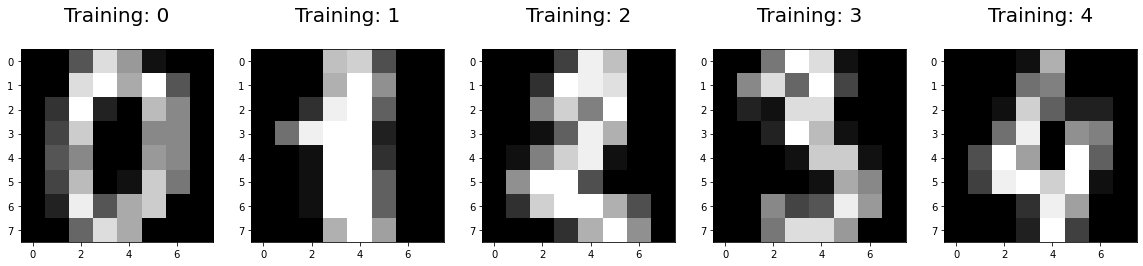

In [32]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## Splitting Data into Training and Test Sets

In [33]:
# test_size: what proportion of original data is used for test set
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

In [34]:
print(x_train.shape)

(1347, 64)


In [35]:
print(y_train.shape)

(1347,)


In [36]:
print(x_test.shape)

(450, 64)


In [37]:
print(y_test.shape)

(450,)


## Scikit-learn 4-Step Modeling Pattern

<b>Step 1: </b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [38]:
from sklearn.linear_model import LogisticRegression 

<b>Step 2:</b> Make an instance of the Model

In [39]:
logisticRegr = LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [40]:
logisticRegr.fit(x_train, y_train)

/home/jmandivarapu1/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<b>Step 4</b>: Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [41]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [42]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [43]:
# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [44]:
predictions.shape

(450,)

In [50]:
450*0.95

427.5

## Measuring Model Performance

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [45]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


## Confusion Matrix (Matplotlib)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

In [48]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

Confusion matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


<Figure size 432x288 with 0 Axes>

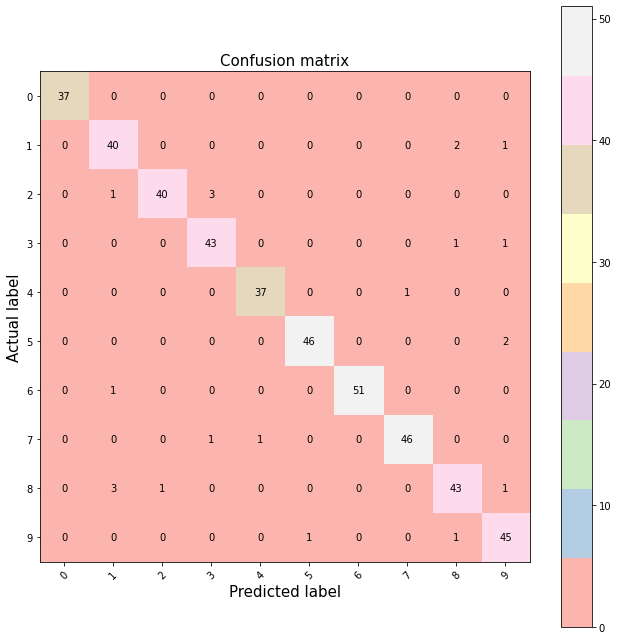

In [49]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

## Confusion Matrix (Seaborn)

<b>Note: Seaborn needs to be installed for this portion </b>

In [21]:
# !conda install seaborn -y

In [22]:
# Make predictions on test data
predictions = logisticRegr.predict(x_test)

In [23]:
cm = metrics.confusion_matrix(y_test, predictions)
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

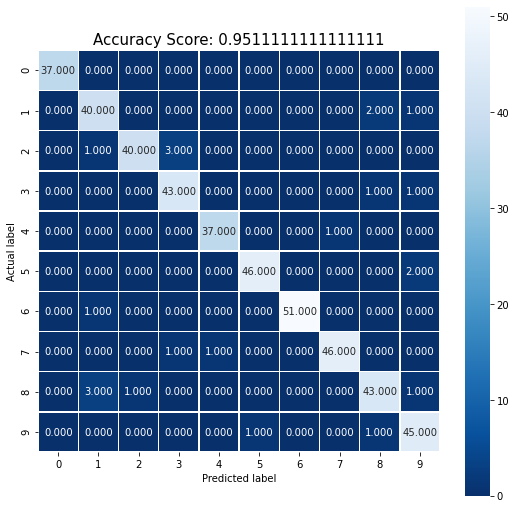

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Display Misclassified images with Predicted Labels

In [51]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

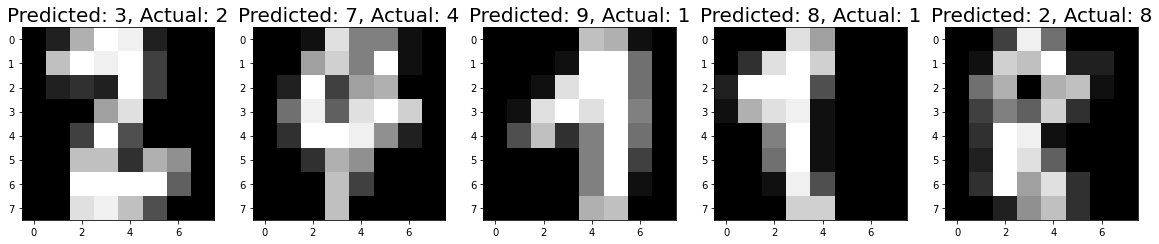

In [52]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)

Part 2 of the tutorial is located here: [MNIST Logistic Regression](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_MNIST.ipynb)

<b>if this tutorial doesn't cover what you are looking for, please leave a comment on the youtube video and I will try to cover what you are interested in. </b>

[youtube video](https://www.youtube.com/watch?v=71iXeuKFcQM)